In [1]:
import requests
import nfl_data_py as nfl
import numpy as np
import pandas as pd
import highlight_text as htext
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as path_effects
import matplotlib.font_manager
from PIL import Image
from io import BytesIO

In [2]:
# add font family
mpl_fm = matplotlib.font_manager.fontManager.addfont(path='/home/friend/Downloads/Akzidenz-grotesk-light.ttf')
mpl_fm = matplotlib.font_manager.fontManager.addfont(path='/home/friend/Downloads/Akzidenz-grotesk-bold.ttf')
mpl_fm = matplotlib.font_manager.fontManager.addfont(path='/home/friend/Downloads/Akzidenz-grotesk-black.ttf')
mpl_fm = matplotlib.font_manager.fontManager.addfont(path='/home/friend/Downloads/Akzidenz-grotesk-roman.ttf')
mpl_fm = matplotlib.font_manager.fontManager.addfont(path='../fonts/Bebas_Neue/BebasNeue-Regular.ttf')

In [3]:
# build team to logo URL dictionary
team_logoURL = {'SF':'https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/San_Francisco_49ers_logo.svg/100px-San_Francisco_49ers_logo.svg.png',
}

In [4]:
team = 'LA'
season = 2022
week = 4
cols = ['game_id','epa','season_type','season','week','drive','series','down','ydstogo','wp','ep','yardline_100','posteam','defteam','game_seconds_remaining']
df_pbp = nfl.import_pbp_data(years=[season], columns=cols, downcast=True, cache=False)

2022 done.
Downcasting floats.


In [5]:
conditional_team = (df_pbp['posteam'] == team)
conditional_week = (df_pbp['week'] == week)
is_down = (df_pbp['down'].notnull())
df_team_week_plays = df_pbp[conditional_team & conditional_week & is_down]
df_team_week_plays

,game_id,epa,season_type,week,drive,series,down,ydstogo,wp,ep,yardline_100,posteam,defteam,game_seconds_remaining,season
9747,2022_04_LA_SF,0.011117,REG,4,1.0,1.0,1.0,10.0,0.433208,0.770222,75.0,LA,SF,3600.0,2022
9748,2022_04_LA_SF,0.811103,REG,4,1.0,1.0,2.0,6.0,0.422482,0.781340,71.0,LA,SF,3570.0,2022
9749,2022_04_LA_SF,-0.555635,REG,4,1.0,2.0,1.0,10.0,0.454899,1.592443,64.0,LA,SF,3538.0,2022
9750,2022_04_LA_SF,0.748041,REG,4,1.0,2.0,2.0,9.0,0.436781,1.036808,63.0,LA,SF,3516.0,2022
9751,2022_04_LA_SF,1.115087,REG,4,1.0,2.0,3.0,1.0,0.437967,1.784849,55.0,LA,SF,3488.0,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9896,2022_04_LA_SF,-0.394357,REG,4,17.0,48.0,2.0,10.0,0.002684,3.446139,24.0,LA,SF,122.0,2022
9898,2022_04_LA_SF,-3.530036,REG,4,17.0,48.0,3.0,10.0,0.002132,3.051782,24.0,LA,SF,118.0,2022
9907,2022_04_LA_SF,0.042358,REG,4,19.0,50.0,1.0,10.0,0.000991,0.859081,58.0,LA,SF,45.0,2022
9908,2022_04_LA_SF,0.092623,REG,4,19.0,50.0,2.0,1.0,0.001043,0.901439,49.0,LA,SF,22.0,2022


In [6]:
count_drives = len(df_team_week_plays.drive.unique())
drives = df_team_week_plays.drive.unique()

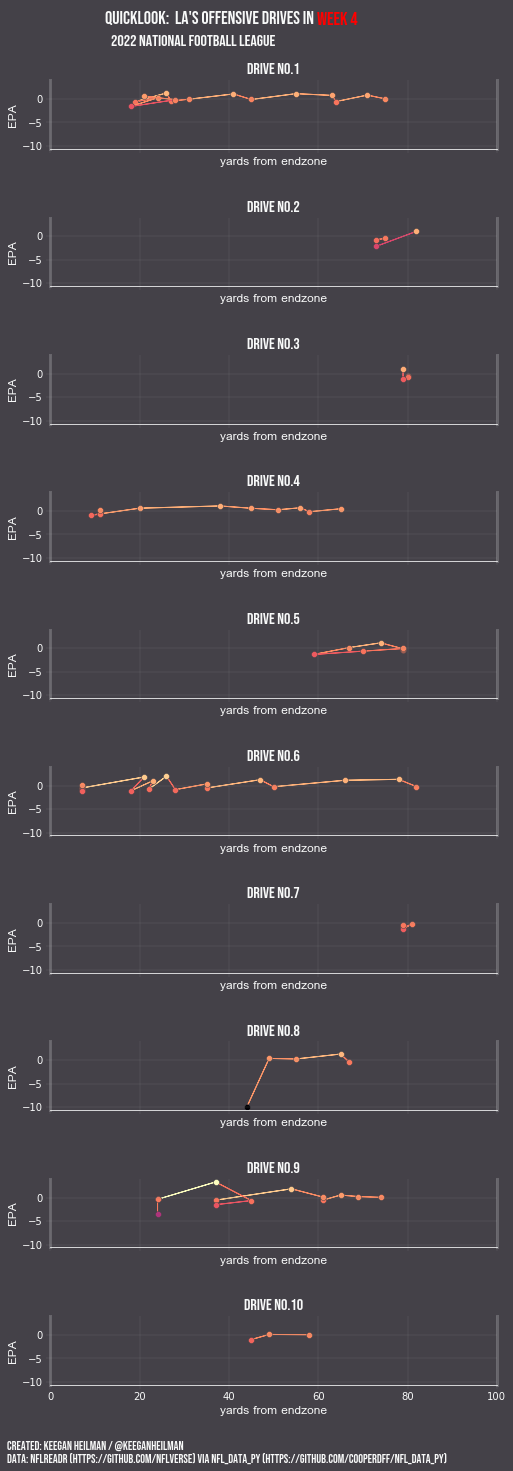

In [72]:
# adjust coloring of downs

font1 = "Mallanna"
font2 =  "Bebas Neue"
font3 = "Loma"
background = "#444148"
text_color = "#F8F9F9"
filler_color = "grey"
primary_color = "red"
first_down = "#CFF3F2"
second_down = "#B2D0CF"
third_down = "#8EA6A5"
fourth_down = "#549694"

title = "Quicklook:  {}'s Offensive Drives in <Week {}>\n"
drive_title = "drive no.{}"
subtitle = "{} National Football League"
credits = "created: keegan heilman / @keeganheilman\ndata: nflreadr (https://github.com/nflverse) via nfl_data_py (https://github.com/cooperdff/nfl_data_py)"

# mpl.rcParams['xtick.color'] = text_color
# mpl.rcParams['ytick.color'] = text_color

fig = plt.figure(figsize=(8,24))
gs = fig.add_gridspec(count_drives, hspace=1)
axs = gs.subplots(sharex=True, sharey=True)
fig.set_facecolor(background)

cmap = matplotlib.cm.get_cmap('magma')
norm = mpl.colors.Normalize(vmin=df_team_week_plays.epa.min(),vmax=df_team_week_plays.epa.max())



for drive_idx, drive in enumerate(drives):
    x = df_team_week_plays[df_team_week_plays.drive == drive].yardline_100.tolist()
    y = df_team_week_plays[df_team_week_plays.drive == drive].epa.tolist()
    axs[drive_idx].patch.set_facecolor(background)
    axs[drive_idx].grid(ls="-", lw=0.2, color="#838383", zorder=1)
    axs[drive_idx].set_title(drive_title.format(drive_idx+1), color=text_color, fontweight="light", fontfamily=font2, fontsize=16)
    axs[drive_idx].set_xlim(0,100)
    axs[drive_idx].set_xlabel("yards from endzone",color=text_color,fontfamily=font3, fontsize=12)
    axs[drive_idx].set_ylabel("EPA",color=text_color,fontfamily=font3, fontsize=12)
    axs[drive_idx].tick_params(axis="both",length=4, width=0.2, color="#838383")
    
    spines = ["top", "right", "bottom", "left"]
    for s in spines:
        if s in ["top"]:
            axs[drive_idx].spines[s].set_visible(False)
        elif s in ["left", "right"]:
            axs[drive_idx].spines[s].set_color(text_color)
            axs[drive_idx].spines[s].set_linewidth(3)
            axs[drive_idx].spines[s].set_alpha(.2)
        else:
            axs[drive_idx].spines[s].set_color(text_color)

    
    for idx, (x_val, y_val) in enumerate(zip(x,y)):
        if idx < len(x)-1:
            # print(x_val,y_val,x[idx+1]-x_val,y[idx+1]-y_val)
            # print(cmap(norm(y_val)))
            axs[drive_idx].arrow(x_val,y_val,x[idx+1]-x_val,y[idx+1]-y_val,color=(cmap(norm(y[idx]))))
        # might assign color to yards to go? or EP?
        axs[drive_idx].scatter(x_val,y_val, color=(cmap(norm(y_val))),edgecolors=background,lw=0.5)



    
htext.fig_text(s=title.format(team, week),x=0.22, y=0.92, highlight_textprops=[{"color":primary_color,"fontweight":"bold"}], color=text_color, fontsize=18, fontweight="bold", fontfamily=font2)
fig.text(0.23,0.90, subtitle.format(season), fontweight="light", color=text_color,fontfamily=font2, fontsize=16)



# # add logo
# ax2 = fig.add_axes([0.07,0.87,0.12,0.12])
# ax2.axis("off")
# url ='https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/San_Francisco_49ers_logo.svg/100px-San_Francisco_49ers_logo.svg.png'
# response = requests.get(url)
# img = Image.open(BytesIO(response.content))
# ax2.imshow(img)
             

fig.text(0.05, 0.08,credits, fontstyle="italic", fontsize=12, fontfamily=font2, color=text_color)
    
# plt.tight_layout()
plt.show()
plt.close('all')